In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

from sklearn.metrics import roc_curve ,roc_auc_score, auc

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/People_charm/People%20Charm%20case.csv")

In [3]:
df.head(10)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
5,0.10,0.77,6,247,4,0,1,0,sales,low
6,0.92,0.85,5,259,5,0,1,0,sales,low
7,0.42,0.53,2,142,3,0,1,0,sales,low
8,0.45,0.54,2,135,3,0,1,0,sales,low
9,0.11,0.81,6,305,4,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [6]:
len(df[df.duplicated()])

3008

In [8]:
df=df.drop_duplicates(subset=None, keep='first', inplace=False)
len(df[df.duplicated()])

0

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Checking imbalance')

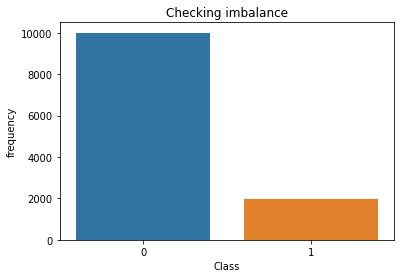

In [11]:
sns.countplot(df["left"])
plt.xlabel("Class")
plt.ylabel("frequency")
plt.title("Checking imbalance")

<ipython-input-13-4580e8b7f774>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.distplot(df.skew(),hist=False)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


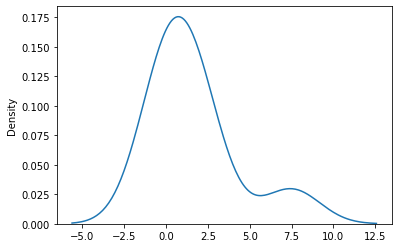

In [13]:
sns.distplot(df.skew(),hist=False)
plt.show()

In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

satisfactoryLevel         0.34
lastEvaluation            0.29
numberOfProjects          2.00
avgMonthlyHours          86.00
timeSpent.company         1.00
workAccident              0.00
left                      0.00
promotionInLast5years     0.00
dtype: float64


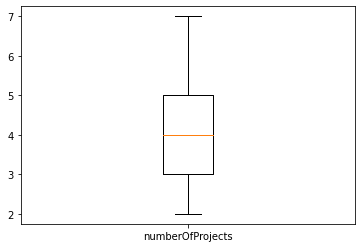

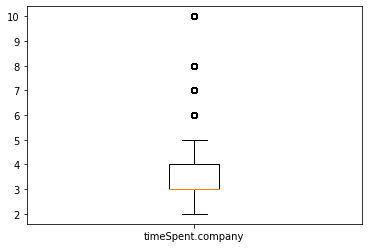

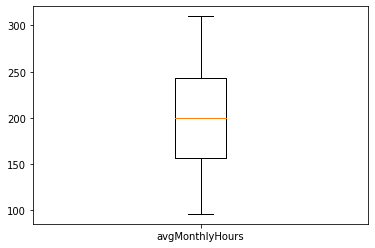

In [15]:
plt.boxplot([df["numberOfProjects"]])
plt.xticks([1],["numberOfProjects"])
plt.show()
plt.boxplot([df["timeSpent.company"]])
plt.xticks([1],["timeSpent.company"])
plt.show()
plt.boxplot([df["avgMonthlyHours"]])
plt.xticks([1],["avgMonthlyHours"])
plt.show()

In [16]:
print(df['timeSpent.company'].quantile(0.10))
print(df['timeSpent.company'].quantile(0.90))

2.0
5.0


In [17]:
df["timeSpent.company"] = np.where(df["timeSpent.company"] <2.0, 2.0,df['timeSpent.company'])
df["timeSpent.company"] = np.where(df["timeSpent.company"] >5.0, 5.0,df['timeSpent.company'])

df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3.0,0,1,0,sales,low
1,0.80,0.86,5,262,5.0,0,1,0,sales,medium
2,0.11,0.88,7,272,4.0,0,1,0,sales,medium
3,0.37,0.52,2,159,3.0,0,1,0,sales,low
4,0.41,0.50,2,153,3.0,0,1,0,sales,low


In [18]:
cols=['dept', 'salary']
for label in cols:
    df[label]=LabelEncoder().fit_transform(df[label])
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3.0,0,1,0,7,1
1,0.80,0.86,5,262,5.0,0,1,0,7,2
2,0.11,0.88,7,272,4.0,0,1,0,7,2
3,0.37,0.52,2,159,3.0,0,1,0,7,1
4,0.41,0.50,2,153,3.0,0,1,0,7,1


In [19]:
cols=['dept', 'salary']
for label in cols:
    df[label]=LabelEncoder().fit_transform(df[label])
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3.0,0,1,0,7,1
1,0.80,0.86,5,262,5.0,0,1,0,7,2
2,0.11,0.88,7,272,4.0,0,1,0,7,2
3,0.37,0.52,2,159,3.0,0,1,0,7,1
4,0.41,0.50,2,153,3.0,0,1,0,7,1


In [20]:
df.corr()["left"]

satisfactoryLevel       -0.350558
lastEvaluation           0.013520
numberOfProjects         0.030928
avgMonthlyHours          0.070409
timeSpent.company        0.264612
workAccident            -0.125436
left                     1.000000
promotionInLast5years   -0.044657
dept                     0.018286
salary                   0.004224
Name: left, dtype: float64

<AxesSubplot:>

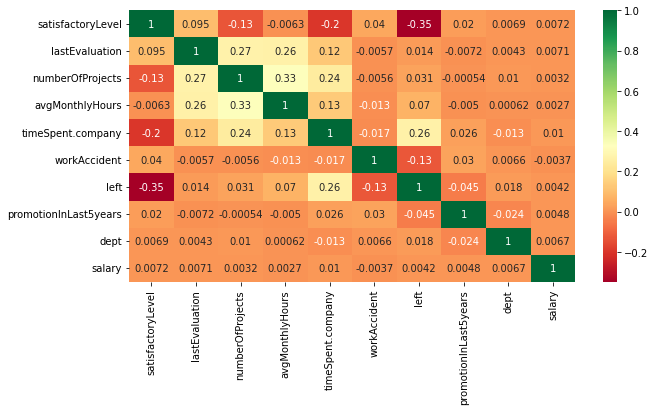

In [21]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), cmap = "RdYlGn", annot = True)

<AxesSubplot:xlabel='salary'>

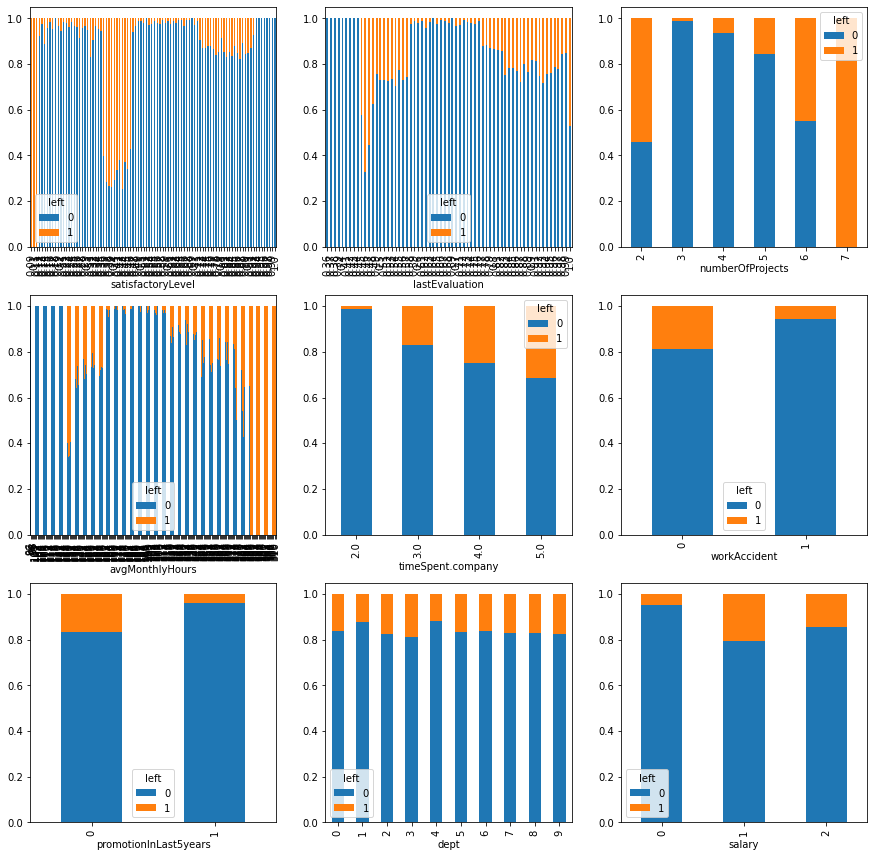

In [22]:
fig, ax = plt.subplots(3,3,figsize = (15,15))
satisfactoryLevel = pd.crosstab(df['satisfactoryLevel'],df['left'])
satisfactoryLevel.div(satisfactoryLevel.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax[0,0])

lastEvaluation = pd.crosstab(df['lastEvaluation'],df['left'])
lastEvaluation.div(lastEvaluation.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[0,1])

numberOfProjects = pd.crosstab(df['numberOfProjects'],df['left'])
numberOfProjects.div(numberOfProjects.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[0,2])

avgMonthlyHours = pd.crosstab(df['avgMonthlyHours'],df['left'])
avgMonthlyHours.div(avgMonthlyHours.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[1,0])

timeSpent = pd.crosstab(df['timeSpent.company'],df['left'])
timeSpent.div(timeSpent.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[1,1])

workAccident = pd.crosstab(df['workAccident'],df['left'])
workAccident.div(workAccident.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[1,2])

promotionInLast5years= pd.crosstab(df['promotionInLast5years'],df['left'])
promotionInLast5years.div(promotionInLast5years.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[2,0])

dept= pd.crosstab(df['dept'],df['left'])
dept.div(dept.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[2,1])

salary= pd.crosstab(df['salary'],df['left'])
salary.div(salary.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[2,2])

In [23]:
scaler=StandardScaler()
X=df.drop(["left"],axis=1)
y=df["left"]

X =scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [24]:
logistic_Regression = LogisticRegression(max_iter=3000,random_state=0,class_weight="balanced",solver = "saga")
logistic_Regression.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=3000, random_state=0,
                   solver='saga')

In [25]:
y_pred = logistic_Regression.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [26]:
log = accuracy_score(y_pred,y_test)*100

cmlr=confusion_matrix(y_pred,y_test)
print(cmlr)

[[1563   41]
 [ 444  351]]


In [27]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87      1604
           1       0.90      0.44      0.59       795

    accuracy                           0.80      2399
   macro avg       0.84      0.71      0.73      2399
weighted avg       0.82      0.80      0.77      2399



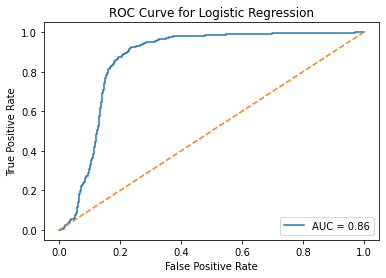

In [29]:
prob_lr=logistic_Regression.predict_proba(x_test)
auc_lr = roc_auc_score(y_test,prob_lr[:,1])
fprlr,tprlr,_ = roc_curve(y_test,prob_lr[:,1])
roc_auc=auc(fprlr,tprlr)
plt.plot(fprlr,tprlr,label = "AUC = %.2f" % auc_lr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

In [30]:
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=35)

In [31]:
pred_knn = knn.predict(x_test)
pred_knn

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
KNN = accuracy_score(pred_knn,y_test)*100

cm_knn=confusion_matrix(pred_knn,y_test)
print(cm_knn)

[[1941   57]
 [  66  335]]


In [33]:
print(classification_report(pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1998
           1       0.85      0.84      0.84       401

    accuracy                           0.95      2399
   macro avg       0.91      0.90      0.91      2399
weighted avg       0.95      0.95      0.95      2399



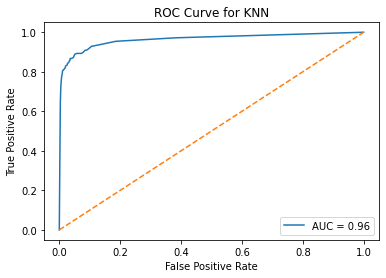

In [34]:
prob_knn= knn.predict_proba(x_test)
auc_knn = roc_auc_score(y_test,prob_knn[:,1])
fprknn,tprknn,_= roc_curve(y_test,prob_knn[:,1])
roc_auc_knn=auc(fprknn,tprknn)
plt.plot(fprknn,tprknn,label = "AUC = %.2f" % auc_knn)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

In [35]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [36]:
pred_gnb = gnb.predict(x_test)
pred_gnb

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
GNB = accuracy_score(pred_gnb,y_test)*100

cm_gnb=confusion_matrix(pred_gnb,y_test)
print(cm_gnb)

[[1753   88]
 [ 254  304]]


In [38]:
print(classification_report(pred_gnb,y_test))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1841
           1       0.78      0.54      0.64       558

    accuracy                           0.86      2399
   macro avg       0.82      0.75      0.78      2399
weighted avg       0.85      0.86      0.85      2399



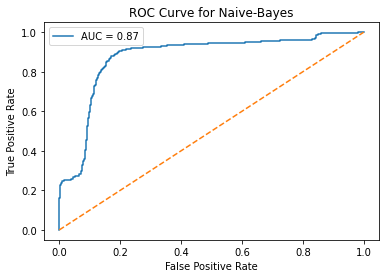

In [39]:
prob_gnb= gnb.predict_proba(x_test)
auc_gnb = roc_auc_score(y_test,prob_gnb[:,1])
fprgnb,tprgnb,_= roc_curve(y_test,prob_gnb[:,1])
roc_auc_gnb=auc(fprgnb,tprgnb)
plt.plot(fprgnb,tprgnb,label = "AUC = %.2f" % auc_gnb)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Naive-Bayes")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

In [40]:
svc = SVC(probability=True)
svc.fit(x_train,y_train)

pred_svc = svc.predict(x_test)
pred_svc

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
SVC = accuracy_score(pred_svc,y_test)*100

cm_svc=confusion_matrix(pred_svc,y_test)
print(cm_svc)

[[1968   43]
 [  39  349]]


In [42]:
print(classification_report(pred_svc,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2011
           1       0.89      0.90      0.89       388

    accuracy                           0.97      2399
   macro avg       0.94      0.94      0.94      2399
weighted avg       0.97      0.97      0.97      2399



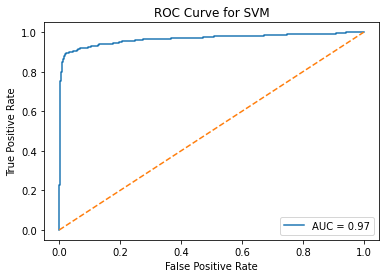

In [44]:

prob_svc= svc.predict_proba(x_test)
auc_svc = roc_auc_score(y_test,prob_svc[:,1])
fprsvc,tprsvc,_= roc_curve(y_test,prob_svc[:,1])
roc_auc_svc=auc(fprsvc,tprsvc)
plt.plot(fprsvc,tprsvc,label = "AUC = %.2f" % auc_svc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

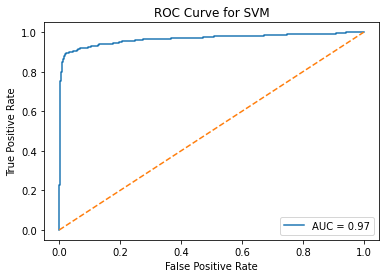

In [45]:
prob_svc= svc.predict_proba(x_test)
auc_svc = roc_auc_score(y_test,prob_svc[:,1])
fprsvc,tprsvc,_= roc_curve(y_test,prob_svc[:,1])
roc_auc_svc=auc(fprsvc,tprsvc)
plt.plot(fprsvc,tprsvc,label = "AUC = %.2f" % auc_svc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

In [49]:

GBC=GradientBoostingClassifier(n_estimators=150)
GBC.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=150)

In [50]:
Y_predict=GBC.predict(x_test)
Y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
gbc = accuracy_score(y_test,Y_predict)*100

cm_gbc=confusion_matrix(y_test,Y_predict)
print(cm_gbc)
print(classification_report(y_test,Y_predict))

[[1988   19]
 [  28  364]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2007
           1       0.95      0.93      0.94       392

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.96      2399
weighted avg       0.98      0.98      0.98      2399



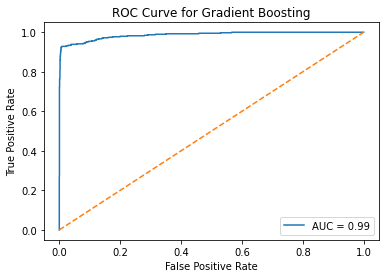

In [52]:
prob_GBC= GBC.predict_proba(x_test)
auc_GBC = roc_auc_score(y_test,prob_GBC[:,1])
fprGBC,tprGBC,_= roc_curve(y_test,prob_GBC[:,1])
roc_auc_GBC=auc(fprGBC,tprGBC)
plt.plot(fprGBC,tprGBC,label = "AUC = %.2f" % auc_GBC)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Gradient Boosting")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

In [53]:
rfc = RandomForestClassifier(n_estimators=30,criterion='gini',random_state=1,max_depth=10)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=1)

In [54]:
pred_rf= rfc.predict(x_test)
pred_rf

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
RFC = accuracy_score(y_test,pred_rf)*100
cm_rf=confusion_matrix(pred_rf,y_test)
print(cm_rf)

[[1996   30]
 [  11  362]]


In [57]:
print(classification_report(pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2026
           1       0.92      0.97      0.95       373

    accuracy                           0.98      2399
   macro avg       0.96      0.98      0.97      2399
weighted avg       0.98      0.98      0.98      2399



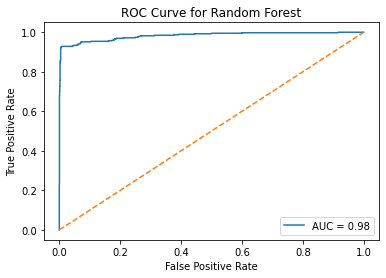

In [58]:
prob_rfc= rfc.predict_proba(x_test)
auc_rfc = roc_auc_score(y_test,prob_rfc[:,1])
fprrfc,tprrfc,_= roc_curve(y_test,prob_rfc[:,1])
roc_auc_rfc=auc(fprrfc,tprrfc)
plt.plot(fprrfc,tprrfc,label = "AUC = %.2f" % auc_rfc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

In [59]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=1,random_state=0)
adaboost = AdaBoostClassifier(n_estimators=80, base_estimator=model,random_state=0)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=1,
                                                         random_state=0),
                   n_estimators=80, random_state=0)

In [60]:
pred = adaboost.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
ada = accuracy_score(y_test,pred)*100
cm_ada=confusion_matrix(pred,y_test)
print(cm_ada)

print(classification_report(pred,y_test))

[[1952   39]
 [  55  353]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1991
           1       0.90      0.87      0.88       408

    accuracy                           0.96      2399
   macro avg       0.94      0.92      0.93      2399
weighted avg       0.96      0.96      0.96      2399



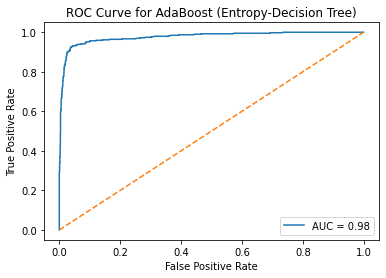

In [62]:

prob_adaboost= adaboost.predict_proba(x_test)
auc_adaboost = roc_auc_score(y_test,prob_adaboost[:,1])
fpradaboost,tpradaboost,_= roc_curve(y_test,prob_adaboost[:,1])
roc_auc_adaboost=auc(fpradaboost,tpradaboost)
plt.plot(fpradaboost,tpradaboost,label = "AUC = %.2f" % auc_adaboost)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for AdaBoost (Entropy-Decision Tree)")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

In [63]:
xgb =  XGBClassifier(learning_rate =0.000001,n_estimators=1000,max_depth=5,min_child_weight=1,
                     subsample=0.8,colsample_bytree=0.8,nthread=4,scale_pos_weight=1,seed=27)
xgb.fit(x_train, y_train)

/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:31:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=1e-06, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              predictor='auto', random_state=27, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [64]:
predxg = xgb.predict(x_test)

xg = accuracy_score(y_test,predxg)*100

cm_xg=confusion_matrix(predxg,y_test)
print(cm_xg)


print(classification_report(predxg,y_test))

[[1995   37]
 [  12  355]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2032
           1       0.91      0.97      0.94       367

    accuracy                           0.98      2399
   macro avg       0.95      0.97      0.96      2399
weighted avg       0.98      0.98      0.98      2399



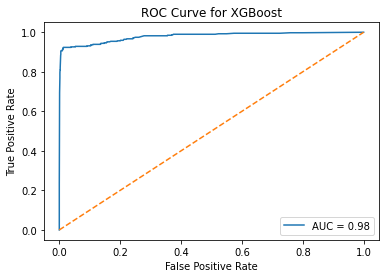

In [65]:
prob_xgb= xgb.predict_proba(x_test)
auc_xgb = roc_auc_score(y_test,prob_xgb[:,1])
fprxgb,tprxgb,_= roc_curve(y_test,prob_xgb[:,1])
roc_auc_xgb=auc(fprxgb,tprxgb)
plt.plot(fprxgb,tprxgb,label = "AUC = %.2f" % auc_xgb)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGBoost")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()